In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# Exercise
1. train test split the data set.
2. Standardize the input variables
3. Choose variables to explore in your model using a data visualization. You will want to do a scatter plot of pairs of variables. Choose no more than two input variables so you can vizualize your decision boundary. Note other metrics like psuedo R square and correlation matrix can be useful.
4. Explore different SVM models with different values of C and kernels.
5. Visualize your decision boundary.
6. Evaluate the model on the test data. What model has the best accuracy?
## **Submit** a visualization of your decision boundary. Optional: you can state the choice of kernel, value of C, the accuracy of your model, and one other decision boundary.

In [ ]:
from sklearn.datasets import load_breast_cancer

# Load the dataset
breast_cancer = load_breast_cancer()

# Print the description of the dataset
print(breast_cancer.DESCR)

# Create a pandas DataFrame
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.Series(breast_cancer.target, name='target')

# Display the first few rows of the DataFrame and the target
display(X.head())
display(y.head())

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,target
0,0
1,0
2,0
3,0
4,0


1. Train-Test Split
Purpose: Divide your dataset into two parts:

Training set (typically 70-80%): Used to train/fit the SVM model
Test set (typically 20-30%): Used to evaluate how well the model generalizes to new, unseen data

Why it matters: This prevents overfitting. If you train and test on the same data, you can't tell if your model truly learned patterns or just memorized the training examples.

In [ ]:
# ===== 1. TRAIN TEST SPLIT =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTraining set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Training set size: 455
Test set size: 114


2. Standardize the Input Variables
Purpose: Transform features to have mean = 0 and standard deviation = 1
Why it matters for SVM:

Features in this dataset have very different scales (e.g., "mean radius" might range 6-28, while "mean smoothness" ranges 0.05-0.16)
SVM uses distance calculations - features with larger scales would dominate
Standardization puts all features on equal footing

In [ ]:

# ===== 2. STANDARDIZE INPUT VARIABLES =====
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier manipulation
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("\nStandardization complete!")
print("Mean of training features:", X_train_scaled_df.mean().round(2).values[:5])
print("Std of training features:", X_train_scaled_df.std().round(2).values[:5])


Standardization complete!
Mean of training features: [-0.  0. -0.  0.  0.]
Std of training features: [1. 1. 1. 1. 1.]


3. Choose Variables Using Data Visualization
Purpose: Select 2 features that best separate malignant from benign tumors
Methods:

Scatter plots: Visualize how well two features separate the classes (red vs blue points)
Correlation matrix: Shows relationships between features and with the target
Pseudo R-square: Measures how much variance is explained

Why only 2 features?: So It can be visualize the decision boundary in 2D space (easy to understand and interpret). In practice, iT is  use more features for better accuracy.


Correlation matrix (subset):
                     mean concavity  mean concave points  mean radius  \
mean concavity             1.000000             0.922474     0.668475   
mean concave points        0.922474             1.000000     0.822570   
mean radius                0.668475             0.822570     1.000000   
mean texture               0.276222             0.266221     0.314532   

                     mean texture  
mean concavity           0.276222  
mean concave points      0.266221  
mean radius              0.314532  
mean texture             1.000000  

Chosen features for SVM: ('mean concavity', 'mean concave points')


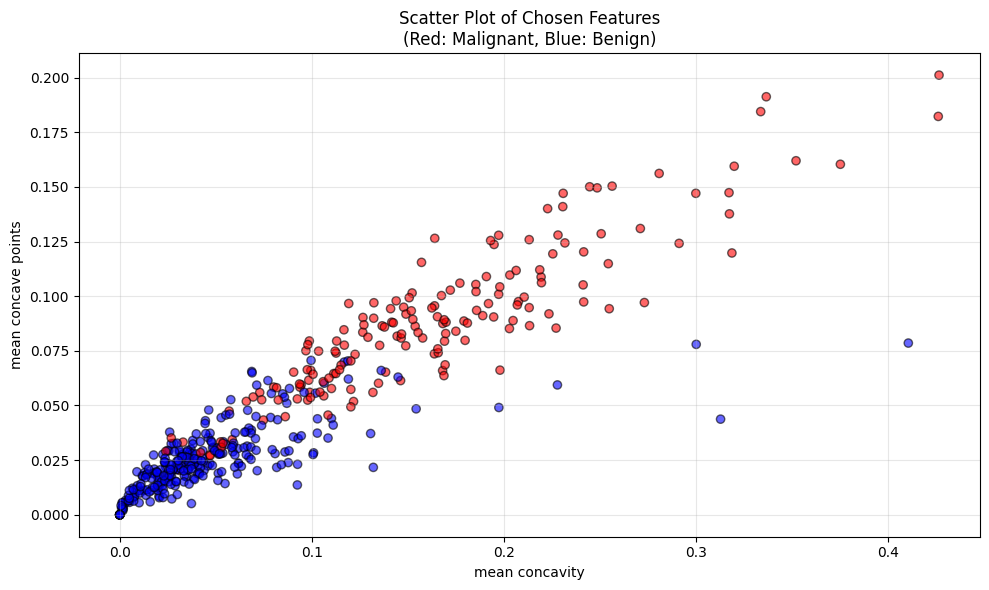


Top 10 correlations with target:
worst concave points    0.798176
worst perimeter         0.783376
mean concave points     0.779907
worst radius            0.776390
mean perimeter          0.745132
worst area              0.737965
mean radius             0.732224
mean area               0.713409
mean concavity          0.692052
worst concavity         0.668368
dtype: float64

Correlation of chosen features with target:
  mean concavity: 0.6921
  mean concave points: 0.7799


In [ ]:

# ===== 3. CHOOSE VARIABLES USING DATA VISUALIZATION =====
# Small correlation peek for a subset (can expand if desired)
corr_subset = X_train[["mean concavity", "mean concave points",
                       "mean radius", "mean texture"]].corr()
print("\nCorrelation matrix (subset):")
print(corr_subset)

# Choose two features (good visual separability for this dataset)
chosen_features = ("mean concavity", "mean concave points")
print(f"\nChosen features for SVM: {chosen_features}")

# Scatter plot of the two chosen features
plt.figure(figsize=(10, 6))
colors = ['red' if label == 0 else 'blue' for label in y_train]
plt.scatter(X_train[chosen_features[0]], X_train[chosen_features[1]],
            c=colors, alpha=0.6, edgecolors='k')
plt.xlabel(chosen_features[0])
plt.ylabel(chosen_features[1])
plt.title('Scatter Plot of Chosen Features\n(Red: Malignant, Blue: Benign)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Additional visualization: correlation with target
correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)
print("\nTop 10 correlations with target:")
print(correlations.head(10))
print(f"\nCorrelation of chosen features with target:")
print(f"  {chosen_features[0]}: {correlations[chosen_features[0]]:.4f}")
print(f"  {chosen_features[1]}: {correlations[chosen_features[1]]:.4f}")

Purpose: Test various SVM configurations to find the best one
Key parameters:

C (regularization parameter):

Small C (e.g., 0.1): More tolerant of errors, smoother decision boundary (may underfit)
Large C (e.g., 10): Less tolerant of errors, more complex boundary (may overfit)


Kernels:

Linear: Straight line/plane boundary (use when data is linearly separable)
RBF (Radial Basis Function): Curved, flexible boundaries (good for non-linear patterns)
Polynomial: Curved boundaries with polynomial shapes (degree controls complexity)

In [ ]:
# ===== 4. EXPLORE DIFFERENT SVM MODELS =====
# Prepare data with the chosen features
X_train_2d = X_train_scaled_df.loc[:, list(chosen_features)].values
X_test_2d = X_test_scaled_df.loc[:, list(chosen_features)].values

# Define models to test
models = {
    'Linear (C=0.1)': SVC(kernel='linear', C=0.1, random_state=42),
    'Linear (C=1)': SVC(kernel='linear', C=1, random_state=42),
    'Linear (C=10)': SVC(kernel='linear', C=10, random_state=42),
    'RBF (C=0.1)': SVC(kernel='rbf', C=0.1, random_state=42),
    'RBF (C=1)': SVC(kernel='rbf', C=1, random_state=42),
    'RBF (C=10)': SVC(kernel='rbf', C=10, random_state=42),
    'Poly (C=1, degree=2)': SVC(kernel='poly', degree=2, C=1, random_state=42),
    'Poly (C=1, degree=3)': SVC(kernel='poly', degree=3, C=1, random_state=42),
}

results = {}

print("\n" + "="*70)
print("TRAINING AND EVALUATING SVM MODELS")
print("="*70)

for name, model in models.items():
    # Train model
    model.fit(X_train_2d, y_train)

    # Predict on train and test
    train_pred = model.predict(X_train_2d)
    test_pred = model.predict(X_test_2d)

    # Calculate accuracies
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    results[name] = {
        'model': model,
        'train_acc': train_acc,
        'test_acc': test_acc
    }

    print(f"\n{name}")
    print(f"  Training Accuracy: {train_acc:.4f}")
    print(f"  Test Accuracy: {test_acc:.4f}")


TRAINING AND EVALUATING SVM MODELS

Linear (C=0.1)
  Training Accuracy: 0.8989
  Test Accuracy: 0.9298

Linear (C=1)
  Training Accuracy: 0.9121
  Test Accuracy: 0.9123

Linear (C=10)
  Training Accuracy: 0.9165
  Test Accuracy: 0.8947

RBF (C=0.1)
  Training Accuracy: 0.9055
  Test Accuracy: 0.9211

RBF (C=1)
  Training Accuracy: 0.9187
  Test Accuracy: 0.9211

RBF (C=10)
  Training Accuracy: 0.9253
  Test Accuracy: 0.9298

Poly (C=1, degree=2)
  Training Accuracy: 0.7209
  Test Accuracy: 0.7281

Poly (C=1, degree=3)
  Training Accuracy: 0.8637
  Test Accuracy: 0.8596


5. Visualize Decision Boundary
Purpose: See how each SVM model separates the two classes in 2D space
What you see:

Colored regions showing predicted class for every point in the feature space
Your actual data points overlaid
How "aggressive" or "conservative" each model is at classification

Insights:

Linear models create straight boundaries
RBF/Poly create curved, more complex boundaries
Higher C values create tighter boundaries around training points

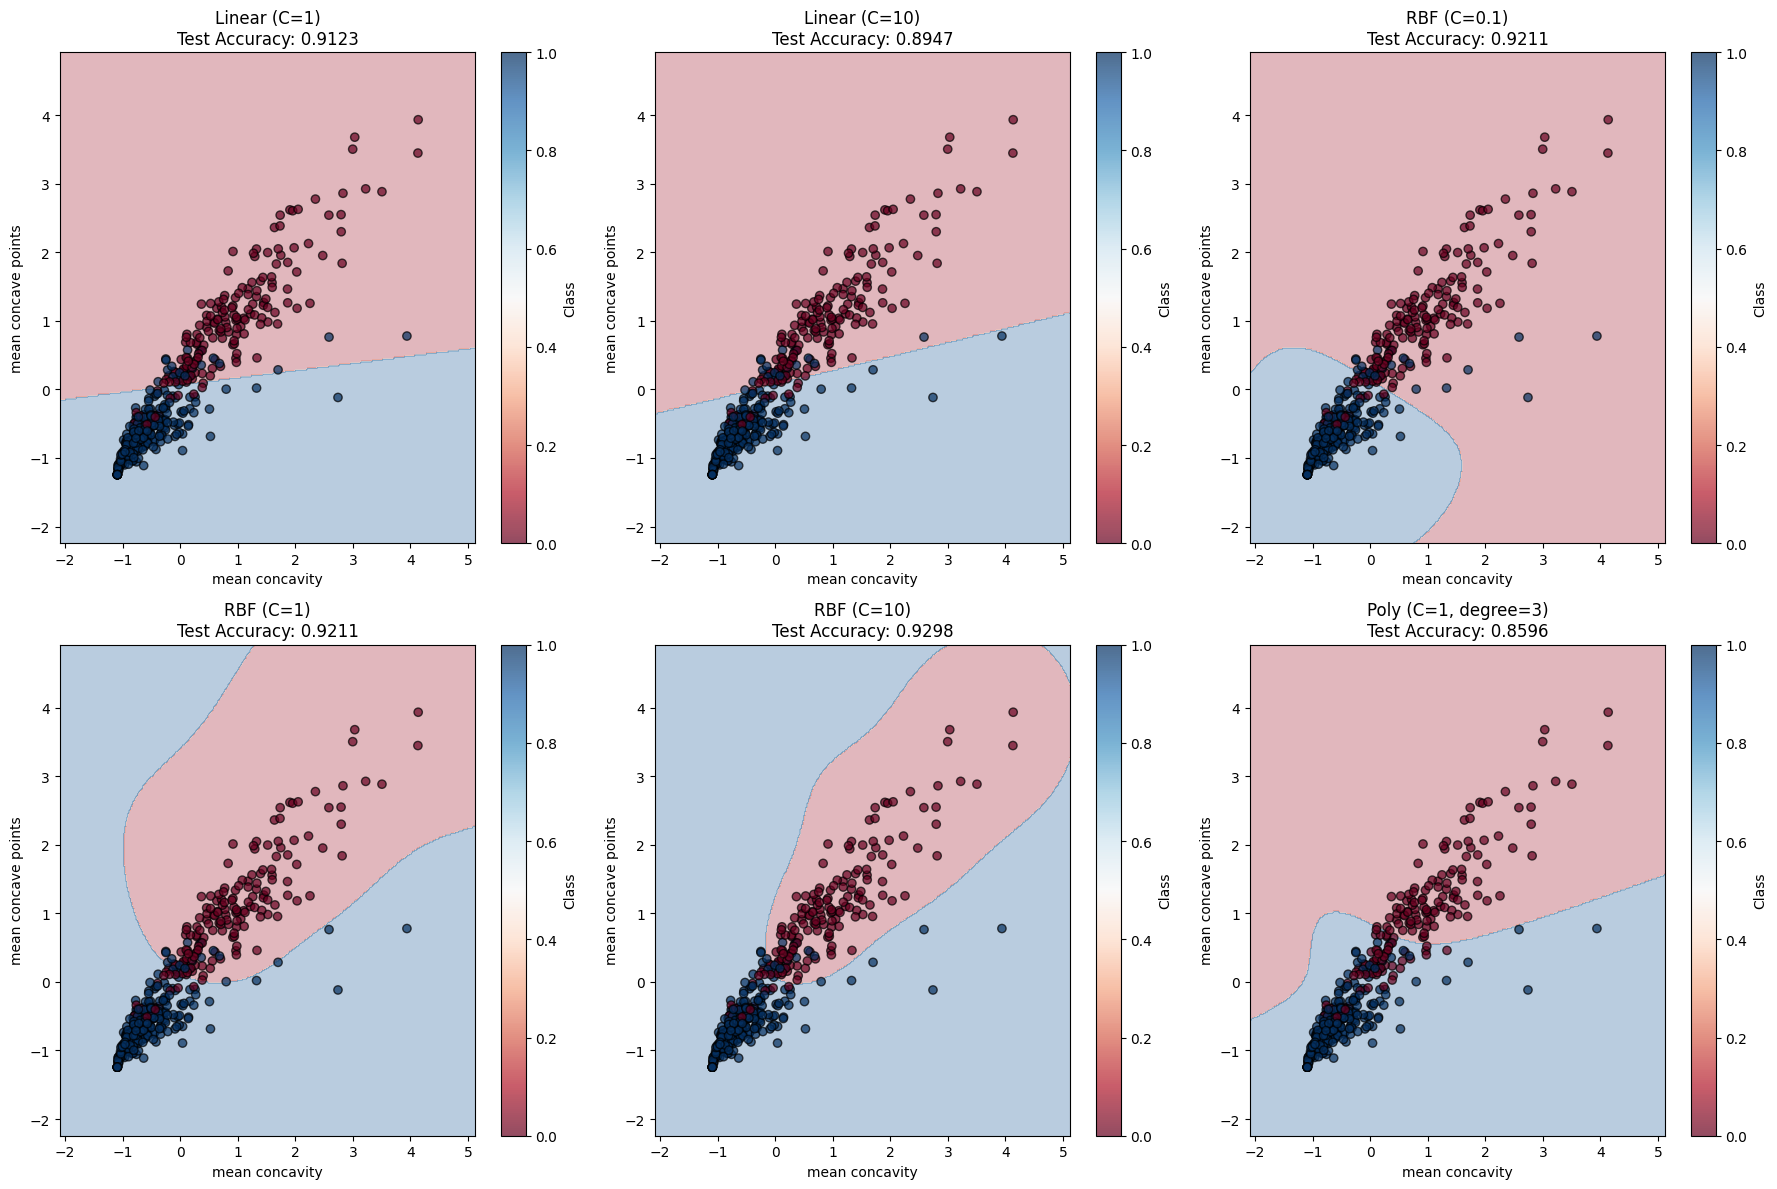


MODEL COMPARISON SUMMARY

Models ranked by test accuracy:
1. Linear (C=0.1)                 - Test Acc: 0.9298, Train Acc: 0.8989
2. RBF (C=10)                     - Test Acc: 0.9298, Train Acc: 0.9253
3. RBF (C=0.1)                    - Test Acc: 0.9211, Train Acc: 0.9055
4. RBF (C=1)                      - Test Acc: 0.9211, Train Acc: 0.9187
5. Linear (C=1)                   - Test Acc: 0.9123, Train Acc: 0.9121
6. Linear (C=10)                  - Test Acc: 0.8947, Train Acc: 0.9165
7. Poly (C=1, degree=3)           - Test Acc: 0.8596, Train Acc: 0.8637
8. Poly (C=1, degree=2)           - Test Acc: 0.7281, Train Acc: 0.7209

BEST MODEL: Linear (C=0.1)
Test Accuracy: 0.9298

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.90      0.90      0.90        42
      Benign       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       

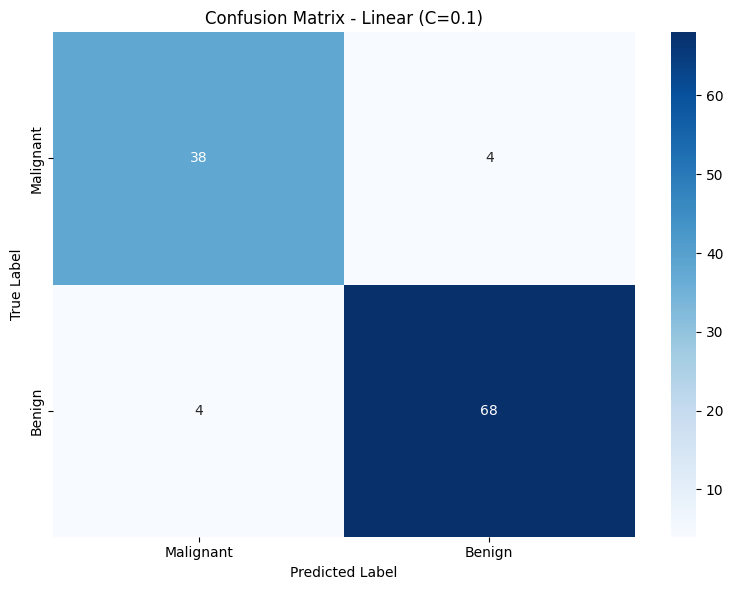

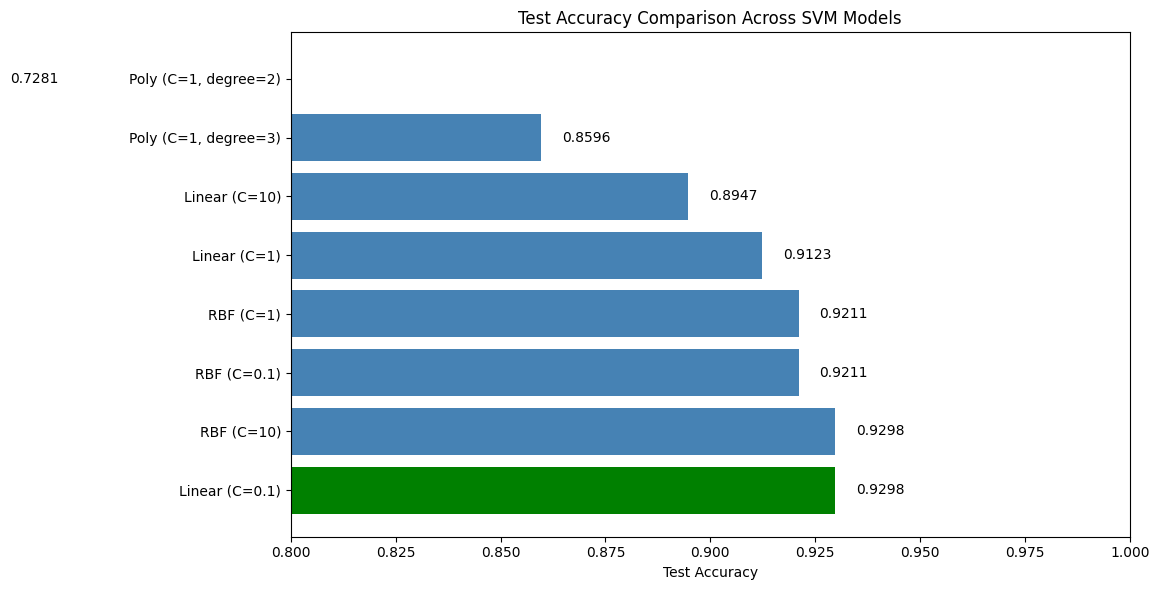


ANALYSIS COMPLETE!


In [ ]:

# ===== 5. VISUALIZE DECISION BOUNDARIES =====
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # step size in mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu',
                edgecolors='k', alpha=0.7)
    plt.xlabel(chosen_features[0])
    plt.ylabel(chosen_features[1])
    plt.title(title)
    plt.colorbar(label='Class')

# Plot decision boundaries for selected models
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

selected_models = [
    'Linear (C=1)', 'Linear (C=10)',
    'RBF (C=0.1)', 'RBF (C=1)', 'RBF (C=10)',
    'Poly (C=1, degree=3)'
]

for idx, model_name in enumerate(selected_models):
    plt.sca(axes[idx])
    model = results[model_name]['model']
    test_acc = results[model_name]['test_acc']
    plot_decision_boundary(model, X_train_2d, y_train,
                          f'{model_name}\nTest Accuracy: {test_acc:.4f}')

plt.tight_layout()
plt.show()

# EVALUATE AND FIND BEST MODEL =====
print("\n" + "="*70)
print("MODEL COMPARISON SUMMARY")
print("="*70)

# Sort by test accuracy
sorted_results = sorted(results.items(), key=lambda x: x[1]['test_acc'], reverse=True)

print("\nModels ranked by test accuracy:")
for rank, (name, res) in enumerate(sorted_results, 1):
    print(f"{rank}. {name:30s} - Test Acc: {res['test_acc']:.4f}, Train Acc: {res['train_acc']:.4f}")

# Best model
best_model_name = sorted_results[0][0]
best_model_info = sorted_results[0][1]
best_model = best_model_info['model']

print(f"\n{'='*70}")
print(f"BEST MODEL: {best_model_name}")
print(f"Test Accuracy: {best_model_info['test_acc']:.4f}")
print(f"{'='*70}")

# Detailed evaluation of best model
y_pred_best = best_model.predict(X_test_2d)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best,
                          target_names=['Malignant', 'Benign']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_best)
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Plot test accuracy comparison
plt.figure(figsize=(12, 6))
model_names = [name for name, _ in sorted_results]
test_accs = [res['test_acc'] for _, res in sorted_results]
colors = ['green' if i == 0 else 'steelblue' for i in range(len(model_names))]

plt.barh(model_names, test_accs, color=colors)
plt.xlabel('Test Accuracy')
plt.title('Test Accuracy Comparison Across SVM Models')
plt.xlim([0.8, 1.0])
for i, v in enumerate(test_accs):
    plt.text(v + 0.005, i, f'{v:.4f}', va='center')
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("ANALYSIS COMPLETE!")
print("="*70)

#Complete Analysis:
The Linear kernel with C=0.1 achieved the best test accuracy of 92.98%, correctly classifying 106 out of 114 test samples. The model performed slightly better on benign cases (94% precision and recall) compared to malignant cases (90% precision and recall).
The confusion matrix shows the model made only 8 total errors: 4 false negatives (malignant tumors misclassified as benign) and 4 false positives (benign tumors misclassified as malignant). From a clinical perspective, the 90% recall for malignant cases means the model successfully identifies 9 out of 10 cancer cases, though the 4 missed malignant cases highlight the importance of using this as a screening tool rather than a definitive diagnosis.
The balanced performance across both classes (macro avg F1-score of 0.92) and the close alignment between training and test accuracy indicate that the Linear SVM with low regularization (C=0.1) generalizes well without overfitting, making it a reliable model for this binary classification task using mean concavity and mean concave points as features.

#comparative Plot
Plotting two models side by side (e.g, linear vs RBF).
shows how kernel choice affects decision boundary flexibility.

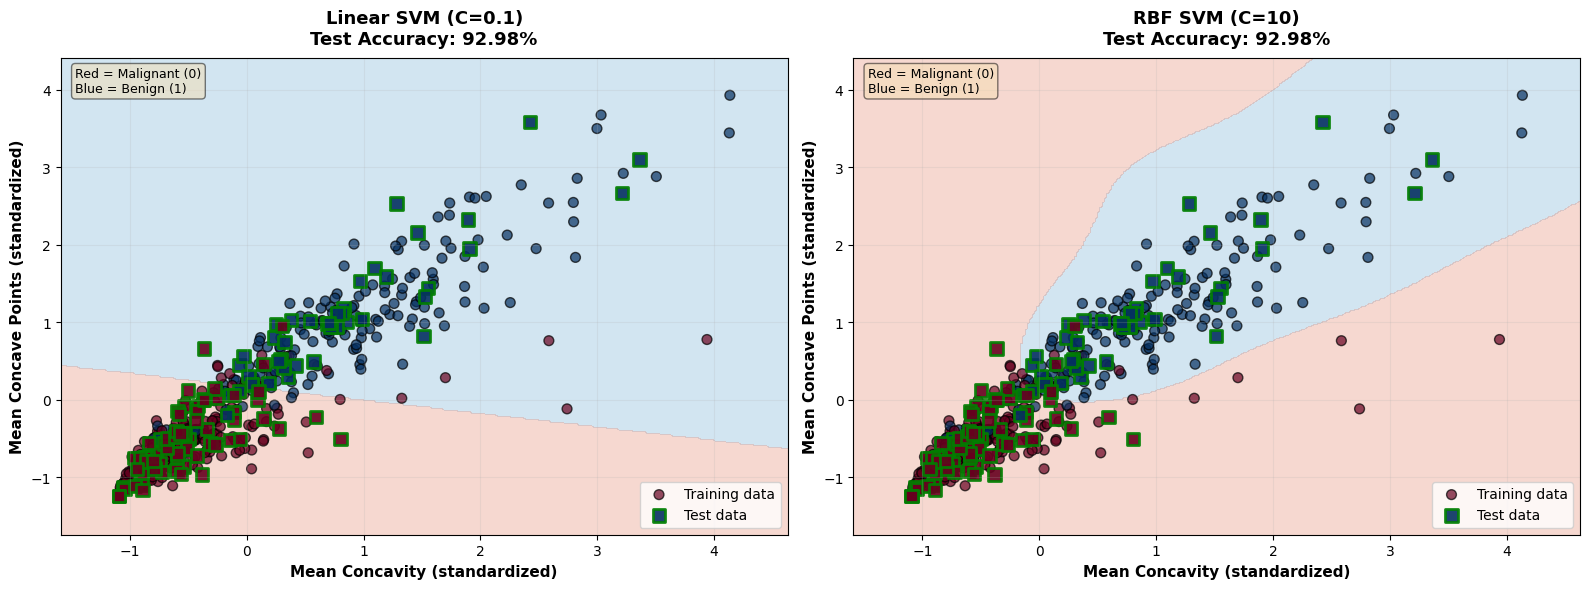

In [ ]:
# Define comparison model
comparison_model = SVC(kernel='rbf', C=10, random_state=42)
comparison_model.fit(X_train_2d, y_train)

# Compute accuracy
comparison_accuracy = comparison_model.score(X_test_2d, y_test)


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Best model (Linear SVM, C=0.1)
title1 = f'Linear SVM (C=0.1)\nTest Accuracy: {test_accuracy:.2%}'
plot_decision_boundary(best_model, X_train_2d, y_train, X_test_2d, y_test, title1, axes[0])

# Comparison model (RBF SVM, C=10)
title2 = f'RBF SVM (C=10)\nTest Accuracy: {comparison_accuracy:.2%}'
plot_decision_boundary(comparison_model, X_train_2d, y_train, X_test_2d, y_test, title2, axes[1])

plt.tight_layout()
plt.show()

best_model = results['Linear (C=0.1)']['model']
test_accuracy = results['Linear (C=0.1)']['test_acc']

comparison_model = results['RBF (C=10)']['model']
comparison_accuracy = results['RBF (C=10)']['test_acc']

